## Ejercicio hiperparametrización breast cancer de sklearn

1. Carga el dataset [breast_cancer de `sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)
2. Prueba al menos 5 modelos diferentes de clasificación y aplica un GridSearchCV mediante Pipelines. Aplica también un RandomizedSearchCV.
3. Conclusiones. Guarda el modelo final en un archivo con pickle.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import xgboost
from sklearn.model_selection import cross_val_score
import sys
import sklearn
import numpy as np
import os
from sklearn.svm import SVC
from sklearn import datasets
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
from sklearn.datasets import load_breast_cancer

In [15]:
bc = load_breast_cancer()

In [18]:
df = pd.DataFrame(bc['data'], columns=bc['feature_names'])
df['target'] = bc['target']

In [19]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


<Axes: >

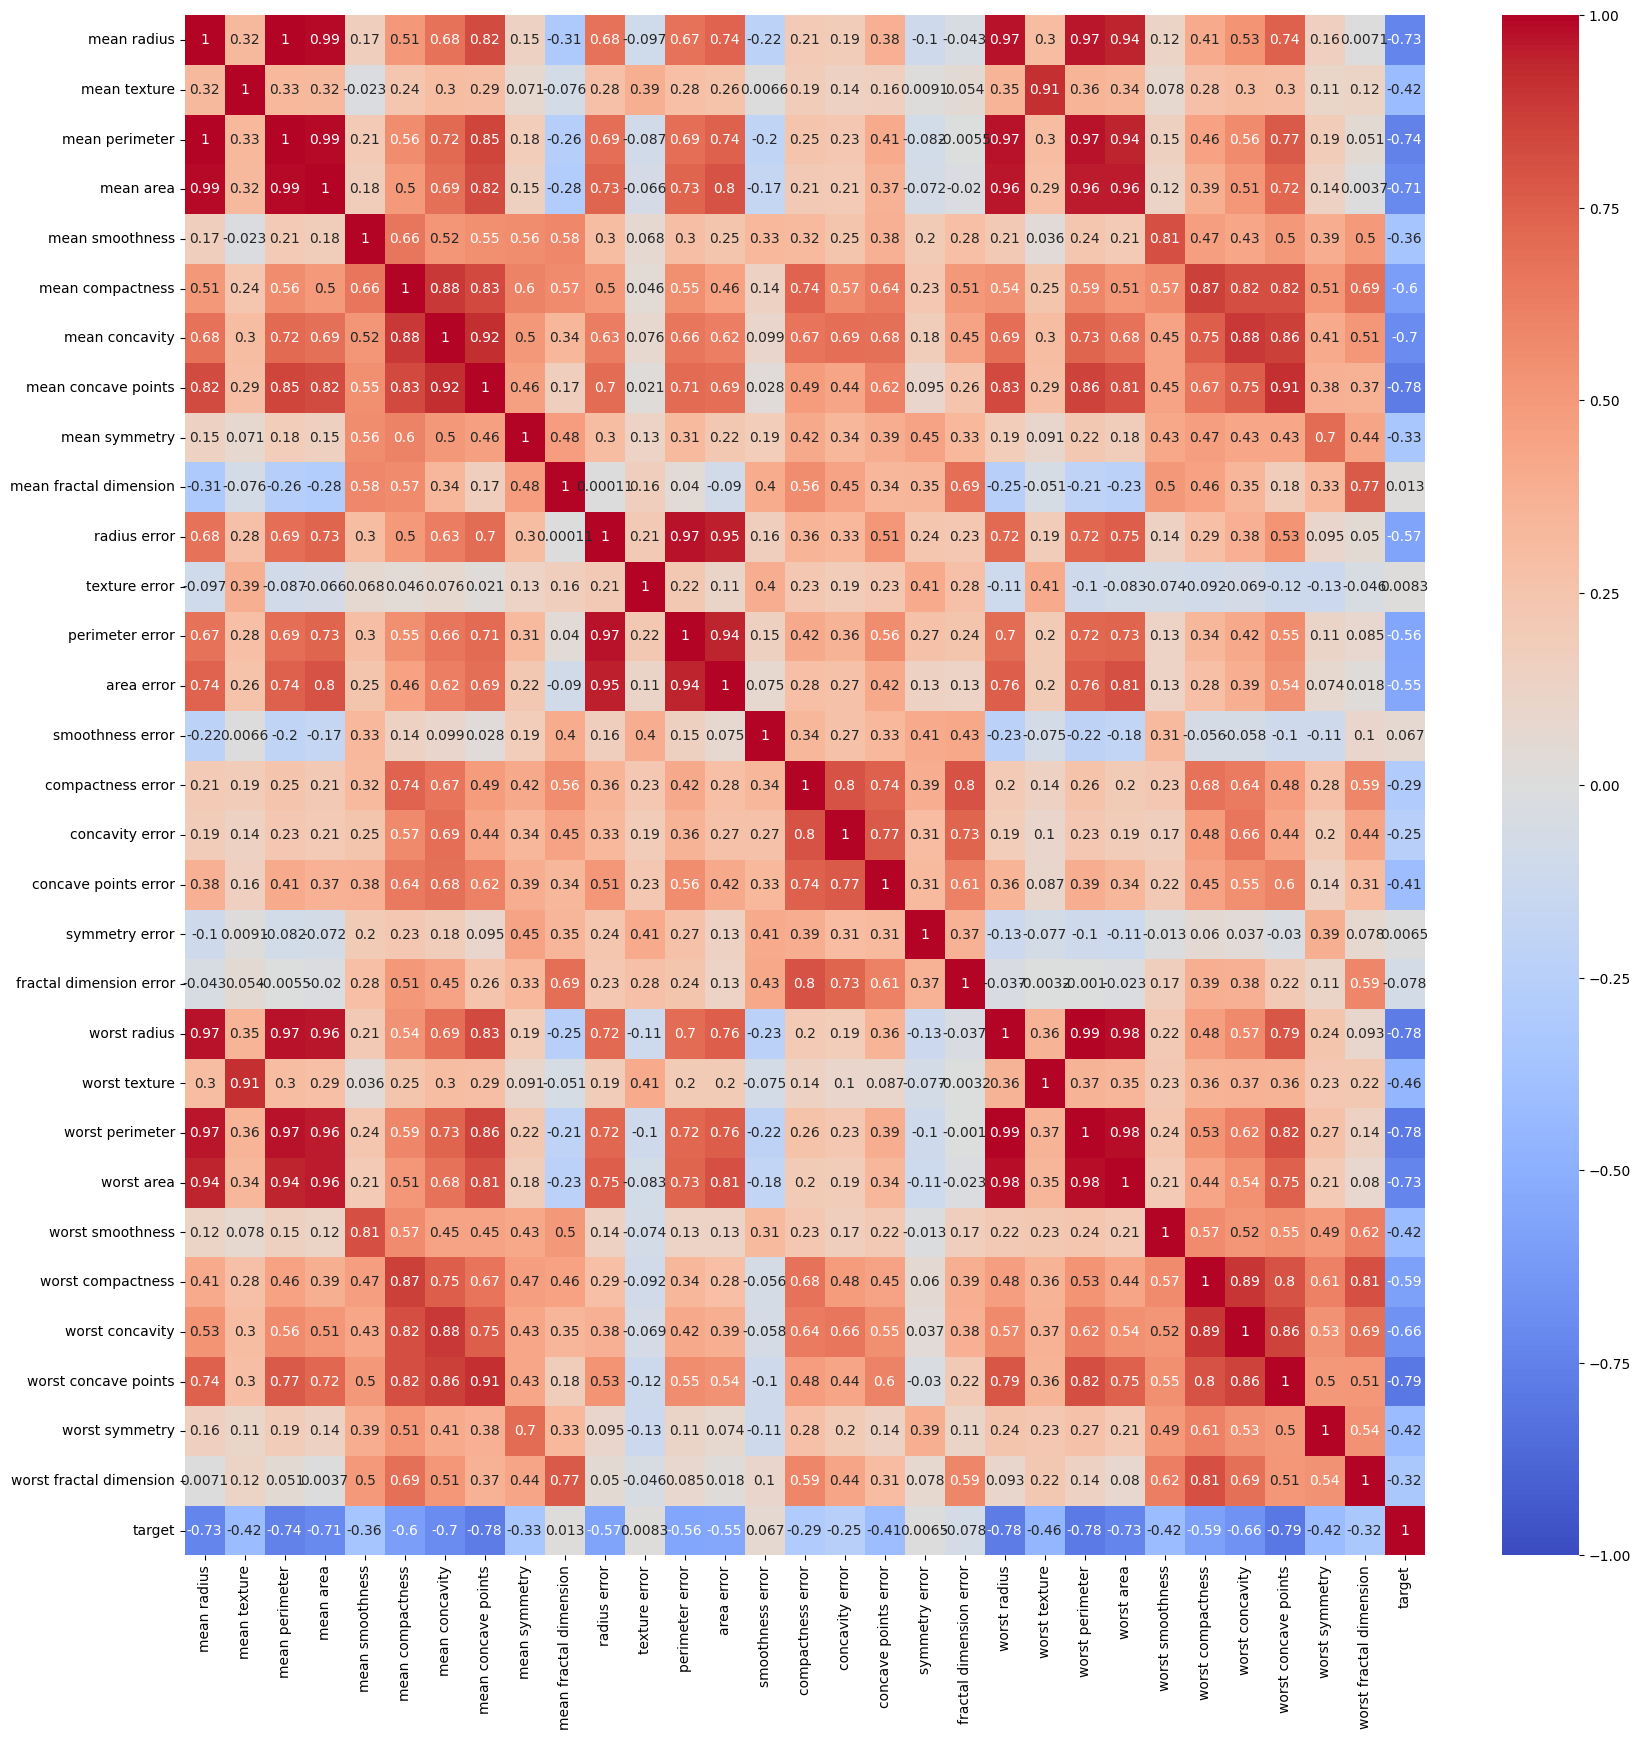

In [23]:
plt.figure(figsize= (20,20))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'coolwarm')

<Axes: xlabel='mean perimeter', ylabel='mean area'>

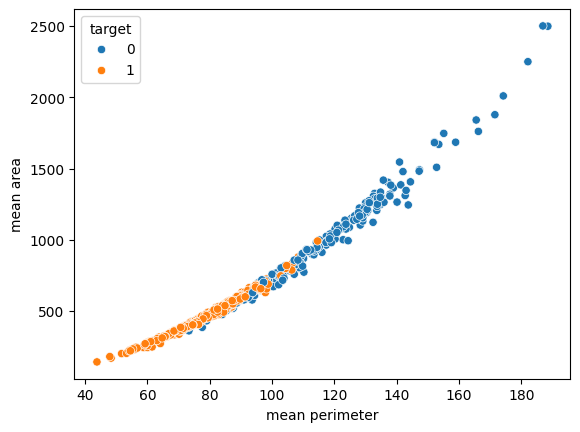

In [26]:
sns.scatterplot(x =df['mean perimeter'], y= df['mean area'], hue = df['target'])

([<matplotlib.patches.Wedge at 0x2b7b6cd1b90>,
 [Text(-0.4286547583668386, 1.0130424957174637, ''),
  Text(0.4286549676938969, -1.0130424071436221, '')])

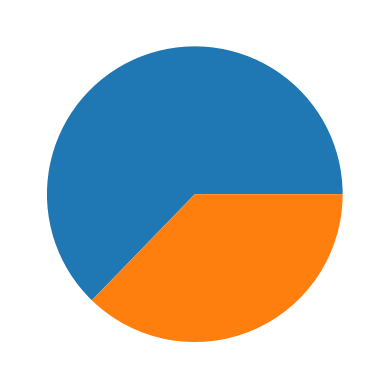

In [30]:
plt.pie(x=df['target'].value_counts())

In [31]:
x = df.drop(columns ='target')
y = df['target']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2, random_state = 10)

In [47]:
Pipeline
StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [38]:
pipe = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest()),
    ('classifier',RandomForestClassifier() )
])
pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection', SelectKBest()),
                ('classifier', RandomForestClassifier())])

In [57]:
log_params = {
    'feature_selection__k' : np.arange(5,15,3),
    'classifier' : [LogisticRegression()],
    'classifier__C' : [0.1,1.10]
}

gb_params = {
    'scaler' : [StandardScaler(), MinMaxScaler(), None],
    'feature_selection__k' : np.arange(5,15,3),
    'classifier' : [GradientBoostingClassifier()],
    'classifier__max_depth' : [3,5,7],
    'classifier__learning_rate' : [0.1,1]
}

knn_params = {
    'feature_selection__k' : np.arange(5,15,3),
    'classifier' : [KNeighborsClassifier()],
    'classifier__k' : np.arange(5,15,2)
}

svm_params = {
    'feature_selection__k' : np.arange(5,15,3),
    'classifier' : [SVC()],
    'classifier__C' : [1,10,100],
    'classifier__kernel' : ['linear', 'rbf']
}

In [58]:
search = [log_params, gb_params, log_params, svm_params]

clf_gs = GridSearchCV(pipe, search, cv = 3, scoring = 'accuracy', n_jobs = -1, verbose=1)

In [59]:
clf_gs.fit(x_train, y_train)

Fitting 3 folds for each of 112 candidates, totalling 336 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('feature_selection', SelectKBest()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression()],
                          'classifier__C': [0.1, 1.1],
                          'feature_selection__k': array([ 5,  8, 11, 14])},
                         {'classifier': [GradientBoostingClassifier()],
                          'classifier__learning_rate'...
                          'feature_selection__k': array([ 5,  8, 11, 14]),
                          'scaler': [StandardScaler(), MinMaxScaler(), None]},
                         {'classifier': [LogisticRegression()],
                          'classifier__C': [0.1, 1.1],
                          'feature_selection__k': array([ 5,  8, 11, 14])},
                         {'classifier': [SVC()], 'classifier__C': [1, 10, 100],
                          'classifier__kernel': ['linear', 'rbf'],
                          'feature_selection__k': array([ 5,  8, 11, 14])}],
             scoring='accuracy', verbose=1)

In [61]:
print(clf_gs.best_estimator_)
print(clf_gs.best_params_)
print(clf_gs.best_score_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection', SelectKBest(k=np.int64(8))),
                ('classifier', SVC(C=100))])
{'classifier': SVC(), 'classifier__C': 100, 'classifier__kernel': 'rbf', 'feature_selection__k': np.int64(8)}
0.9516091553386778
